In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

#Load Dataset

In [ ]:
# Memuat dataset Wine Quality
data = load_wine()
X, y = data.data, data.target

In [ ]:
# Melihat distribusi kelas
print("Distribusi kelas sebelum SMOTE:", Counter(y))

Distribusi kelas sebelum SMOTE: Counter({0: 901, 1: 99})


#Filter Method

In [ ]:
filter_selector = SelectKBest(score_func=chi2, k=2)  # Memilih 2 fitur terbaik
X_train_filter = filter_selector.fit_transform(X_train, y_train)
X_test_filter = filter_selector.transform(X_test)

print("Fitur yang dipilih dengan Filter Methods:", filter_selector.get_support(indices=True))

Fitur yang dipilih dengan Filter Methods: [ 9 12]


#Wrapper Methods

In [ ]:
# Menggunakan RFE (Recursive Feature Elimination)
model = LogisticRegression(solver='lbfgs', max_iter=5000)
rfe_selector = RFE(model, n_features_to_select=2)  # Memilih 2 fitur
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

print("Fitur yang dipilih dengan Wrapper Methods:", rfe_selector.get_support(indices=True))

Fitur yang dipilih dengan Wrapper Methods: [0 6]


#Embedded Methods

In [ ]:
# ------------------- Embedded Methods -------------------
# Menggunakan Random Forest untuk mendapatkan fitur penting
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Menentukan ambang batas untuk fitur penting
threshold = 0.05  # Misalnya, ambang batas 5%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# Memindahkan fitur penting ke variabel baru
X_important = X_train[:, important_features_indices]  # Hanya fitur penting dari data pelatihan
X_test_important = X_test[:, important_features_indices]  # Hanya fitur penting dari data pengujian

# Mencetak fitur yang dipilih
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
    print(f"{data.feature_names[i]}: {importances[i]}")

# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)
print("Dimensi data pengujian dengan fitur penting:", X_test_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
alcohol: 0.11239773542143086
flavanoids: 0.20229341635663622
color_intensity: 0.1712021830864957
hue: 0.07089132259413944
od280/od315_of_diluted_wines: 0.1115643167260497
proline: 0.13904586955351153

Dimensi data pelatihan dengan fitur penting: (142, 6)
Dimensi data pengujian dengan fitur penting: (36, 6)


#Evaluasi Model

In [ ]:
# Evaluasi dengan fitur terpilih dari masing-masing metode
def evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    return accuracy

In [ ]:
# Model Logistic Regression untuk Filter Methods
logistic_model_filter = LogisticRegression(max_iter=200)
accuracy_filter = evaluate_model(X_train_filter, X_test_filter, y_train, y_test, logistic_model_filter)

# Model Logistic Regression untuk Wrapper Methods
logistic_model_rfe = LogisticRegression(max_iter=200)
accuracy_rfe = evaluate_model(X_train_rfe, X_test_rfe, y_train, y_test, logistic_model_rfe)

# Model Random Forest untuk Embedded Methods
accuracy_rf = evaluate_model(X_important, X_test_important, y_train, y_test, rf_model)

In [ ]:
print(f"\nAkurasi Model dengan Filter Methods: {accuracy_filter:.2f}")
print(f"Akurasi Model dengan Wrapper Methods: {accuracy_rfe:.2f}")
print(f"Akurasi Model dengan Embedded Methods: {accuracy_rf:.2f}")


Akurasi Model dengan Filter Methods: 0.89
Akurasi Model dengan Wrapper Methods: 0.94
Akurasi Model dengan Embedded Methods: 1.00


#Feature Enginerring

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=15, n_informative=10, n_redundant=2,n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=42)

In [ ]:
# Menyusun dataset menjadi DataFrame untuk kemudahan
df = pd.DataFrame(X, columns=[f'Fitur_{i}' for i in range(1, 16)])
df['Target'] = y

# Misalkan kita punya beberapa fitur kategorikal (simulasi fitur kategorikal)
df['Fitur_12'] = np.random.choice(['A', 'B', 'C'], size=1000)
df['Fitur_13'] = np.random.choice(['X', 'Y', 'Z'], size=1000)

df

,Fitur_1,Fitur_2,Fitur_3,Fitur_4,Fitur_5,Fitur_6,Fitur_7,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_12,Fitur_13,Fitur_14,Fitur_15,Target
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,A,X,1.005559,-0.276558,0
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,B,Z,-0.243630,0.285979,0
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,A,X,2.486020,-2.867291,0
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,A,Y,-0.788215,1.255376,0
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,B,X,0.712335,2.810524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.927482,-0.017325,4.884411,0.542628,3.033376,-1.904407,0.953035,1.278882,-1.293396,1.772169,-1.191263,C,Y,-0.387151,-2.629004,0
996,0.347761,-1.690916,5.949207,-2.289729,2.238469,-0.067922,-0.069702,-1.436622,-2.153011,-0.867583,3.962758,B,Y,0.886822,-1.248408,0
997,1.201967,-1.263417,-1.331925,-2.468434,1.777577,2.270456,-0.431749,-1.846263,1.753033,1.858452,4.264568,A,X,0.067260,0.931995,1
998,-2.127846,-0.975838,0.279144,0.151578,-0.443749,0.650616,-1.410265,-1.017319,-0.643070,2.142898,3.399255,C,Z,-0.128774,0.800834,0


In [ ]:
# Memisahkan fitur dan target
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
# Melihat distribusi kelas
print("Distribusi kelas sebelum SMOTE:", Counter(y))

Distribusi kelas sebelum SMOTE: Counter({0: 901, 1: 99})


# ------------------- Embedded Methods -------------------

In [ ]:
# Menggunakan Random Forest untuk mendapatkan fitur penting
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_integer = X.drop(['Fitur_12', 'Fitur_13'], axis=1)
rf_model.fit(X_integer, y)

# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Menentukan ambang batas untuk fitur penting
threshold = 0.05  # Misalnya, ambang batas 5%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# Menampilkan fitur penting beserta nilainya
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
    # Jika X asli berbentuk DataFrame, maka kita ambil nama kolom
    print(f"{X.columns[i]}: {importances[i]}")

# Mendapatkan nama kolom penting berdasarkan importance
important_features = X_integer.columns[important_features_indices]

# Memindahkan fitur penting ke variabel baru
X_important = X_integer[important_features]  # Hanya fitur penting dari data pelatihan

# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
Fitur_2: 0.11860019897866206
Fitur_3: 0.06878603593465271
Fitur_5: 0.07731131335837178
Fitur_8: 0.050482655781999855
Fitur_9: 0.2625049418105367
Fitur_10: 0.08958259568334655
Fitur_11: 0.06365230544114515
Fitur_13: 0.12578161860669113

Dimensi data pelatihan dengan fitur penting: (1000, 8)


In [ ]:
X_Selected = pd.concat([X_important, X['Fitur_12']], axis=1)
X_Selected = pd.concat([X_Selected, X['Fitur_13']], axis=1)
X_Selected

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15,Fitur_12,Fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,A,X
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,B,Z
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,A,X
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,A,Y
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,B,X
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,C,Y
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,B,Y
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,A,X
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,C,Z


#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Melakukan Encoding untuk fitur 12
X_Selected['Fitur_12'] = label_encoder.fit_transform(X_Selected['Fitur_12'])
# print(label_encoder.inverse_transform(X_Selected[['Fitur_12']]))
# Melakukan Encoding untuk fitur 13
X_Selected['Fitur_13'] = label_encoder.fit_transform(X_Selected['Fitur_13'])
# print(label_encoder.inverse_transform(X_Selected[['Fitur_13']]))

print(X_Selected)

      Fitur_2   Fitur_3   Fitur_5   Fitur_8   Fitur_9  Fitur_10  Fitur_11  \
0   -3.472520 -1.314199  0.642138  1.146301 -2.173112  2.765828 -1.821258   
1   -1.770842 -1.578851 -2.025230 -3.958705 -0.598147  1.018789  4.194233   
2   -2.051770  3.631998  1.674093  0.031633 -1.140149  2.069694  1.935251   
3   -1.608657 -0.735184 -1.753532 -2.897416 -0.830328  1.572469  5.334621   
4   -2.362885 -3.909120 -4.029843 -3.435229 -2.142380  2.332385  3.816539   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.017325  4.884411  3.033376  1.278882 -1.293396  1.772169 -1.191263   
996 -1.690916  5.949207  2.238469 -1.436622 -2.153011 -0.867583  3.962758   
997 -1.263417 -1.331925  1.777577 -1.846263  1.753033  1.858452  4.264568   
998 -0.975838  0.279144 -0.443749 -1.017319 -0.643070  2.142898  3.399255   
999  1.387667 -5.554578 -2.834755 -1.932864  2.625895  0.246120  0.786726   

     Fitur_15  Fitur_12  Fitur_13  
0   -0.276558         0         0  
1  

#Handling Outlier

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Memilih kolom numerik
numeric_columns = X_Selected.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['Fitur_12', 'Fitur_13'])

# Membuat salinan data untuk menjaga data asli tetap utuh
X_cleaned = X_important.copy()

In [ ]:
for col in numeric_columns:
    # Melihat outlier dengan IQR (Interquartile Range)
    Q1 = X_important[col].quantile(0.25)
    Q3 = X_important[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outliers = X_cleaned[(X_cleaned[col] < lower_bound) | (X_cleaned[col] > upper_bound)]

    # Menghapus outlier dari DataFrame
    X_cleaned = X_cleaned.drop(outliers.index)

In [ ]:
X_cleaned

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834


#SMOTE

In [ ]:
# Sinkronisasi jumlah sampel antara X_cleaned dan y
min_samples = min(X_cleaned.shape[0], len(y))

X_cleaned = X_cleaned[:min_samples]
y = y[:min_samples]

# Verifikasi hasil
print("Jumlah sampel X_cleaned setelah sinkronisasi:", X_cleaned.shape[0])
print("Jumlah sampel y setelah sinkronisasi:", len(y))


Jumlah sampel X_cleaned setelah sinkronisasi: 949
Jumlah sampel y setelah sinkronisasi: 949


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Oversampling dengan SMOTE
X_resampled, y_resampled = smote.fit_resample(X_cleaned, y)

# Menampilkan distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))

# Mengubah hasil menjadi DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=X_cleaned.columns)
y_resampled = pd.Series(y_resampled, name='Target')

# Tampilkan data hasil oversampling
print("Data hasil oversampling:")
print(X_resampled.head())
print(y_resampled.head())


Distribusi kelas setelah SMOTE: Counter({0: 854, 1: 854})
Data hasil oversampling:
    Fitur_2   Fitur_3   Fitur_5   Fitur_8   Fitur_9  Fitur_10  Fitur_11  \
0 -3.472520 -1.314199  0.642138  1.146301 -2.173112  2.765828 -1.821258   
1 -1.770842 -1.578851 -2.025230 -3.958705 -0.598147  1.018789  4.194233   
2 -2.051770  3.631998  1.674093  0.031633 -1.140149  2.069694  1.935251   
3 -1.608657 -0.735184 -1.753532 -2.897416 -0.830328  1.572469  5.334621   
4 -2.362885 -3.909120 -4.029843 -3.435229 -2.142380  2.332385  3.816539   

   Fitur_15  
0 -0.276558  
1  0.285979  
2 -2.867291  
3  1.255376  
4  2.810524  
0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


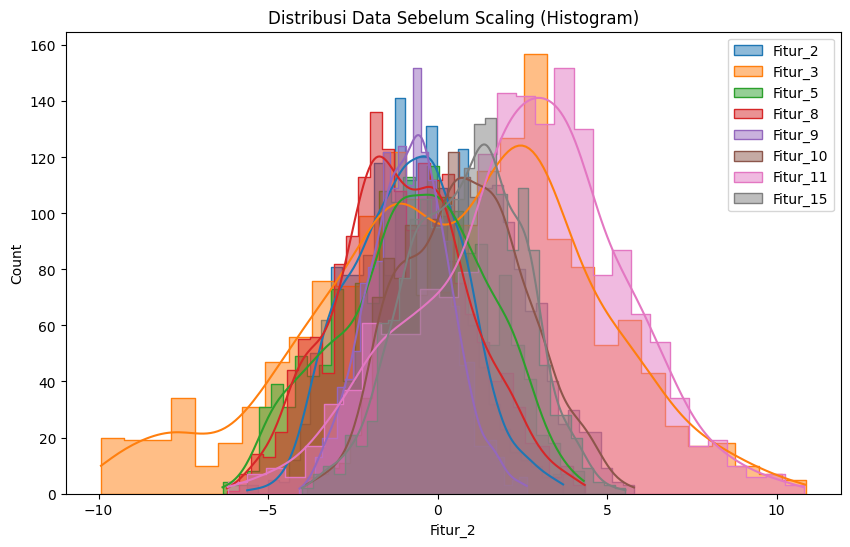

In [ ]:
# 1. Visualisasi distribusi data sebelum scaling menggunakan histogram
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Sebelum Scaling (Histogram)')
plt.legend()
plt.show()

#Standarisasi

In [ ]:
# Scaling: Standarisasi fitur numerik menggunakan StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada fitur penting
X_resampled[important_features] = scaler.fit_transform(X_resampled[important_features])

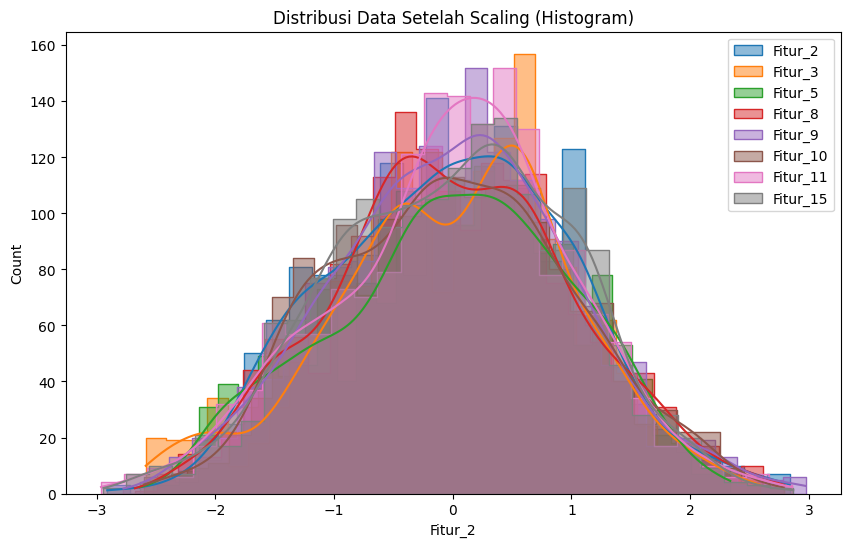

In [ ]:
# 1. Visualisasi distribusi data sebelum scaling menggunakan histogram
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Setelah Scaling (Histogram)')
plt.legend()
plt.show()

In [ ]:
X_resampled.describe(include='all')

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15
count,1.708000e+03,1.708000e+03,1.708000e+03,1.708000e+03,1.708000e+03,1.708000e+03,1.708000e+03,1.708000e+03
mean,9.152190e-17,4.160086e-18,2.184045e-17,3.848080e-17,-4.576095e-17,1.664035e-17,-1.799237e-16,-1.040022e-17
std,1.000293e+00,1.000293e+00,1.000293e+00,1.000293e+00,1.000293e+00,1.000293e+00,1.000293e+00,1.000293e+00
min,-2.910256e+00,-2.586039e+00,-2.636351e+00,-2.677288e+00,-2.773544e+00,-2.601203e+00,-2.962647e+00,-2.942073e+00
25%,-7.279931e-01,-6.239804e-01,-6.781122e-01,-6.736515e-01,-6.706434e-01,-7.731511e-01,-6.389414e-01,-7.351286e-01
50%,2.285102e-02,1.005549e-01,5.034930e-02,-2.287708e-02,3.437617e-02,-1.950790e-02,8.087398e-02,5.678811e-02
75%,7.013150e-01,6.682914e-01,7.353094e-01,6.744795e-01,6.775212e-01,6.758058e-01,6.490723e-01,7.284031e-01
max,2.838857e+00,2.585896e+00,2.337500e+00,2.793255e+00,2.971793e+00,2.786665e+00,2.859322e+00,2.868101e+00
